In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'

## 1. 데이터셋 가져오기

In [2]:
loan_train = pd.read_csv('./datasets/loan-train.csv')
loan_test = pd.read_csv('./datasets/loan-test.csv')

## 2. 데이터 탐색

### 2.1 데이터 살펴보기

In [3]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


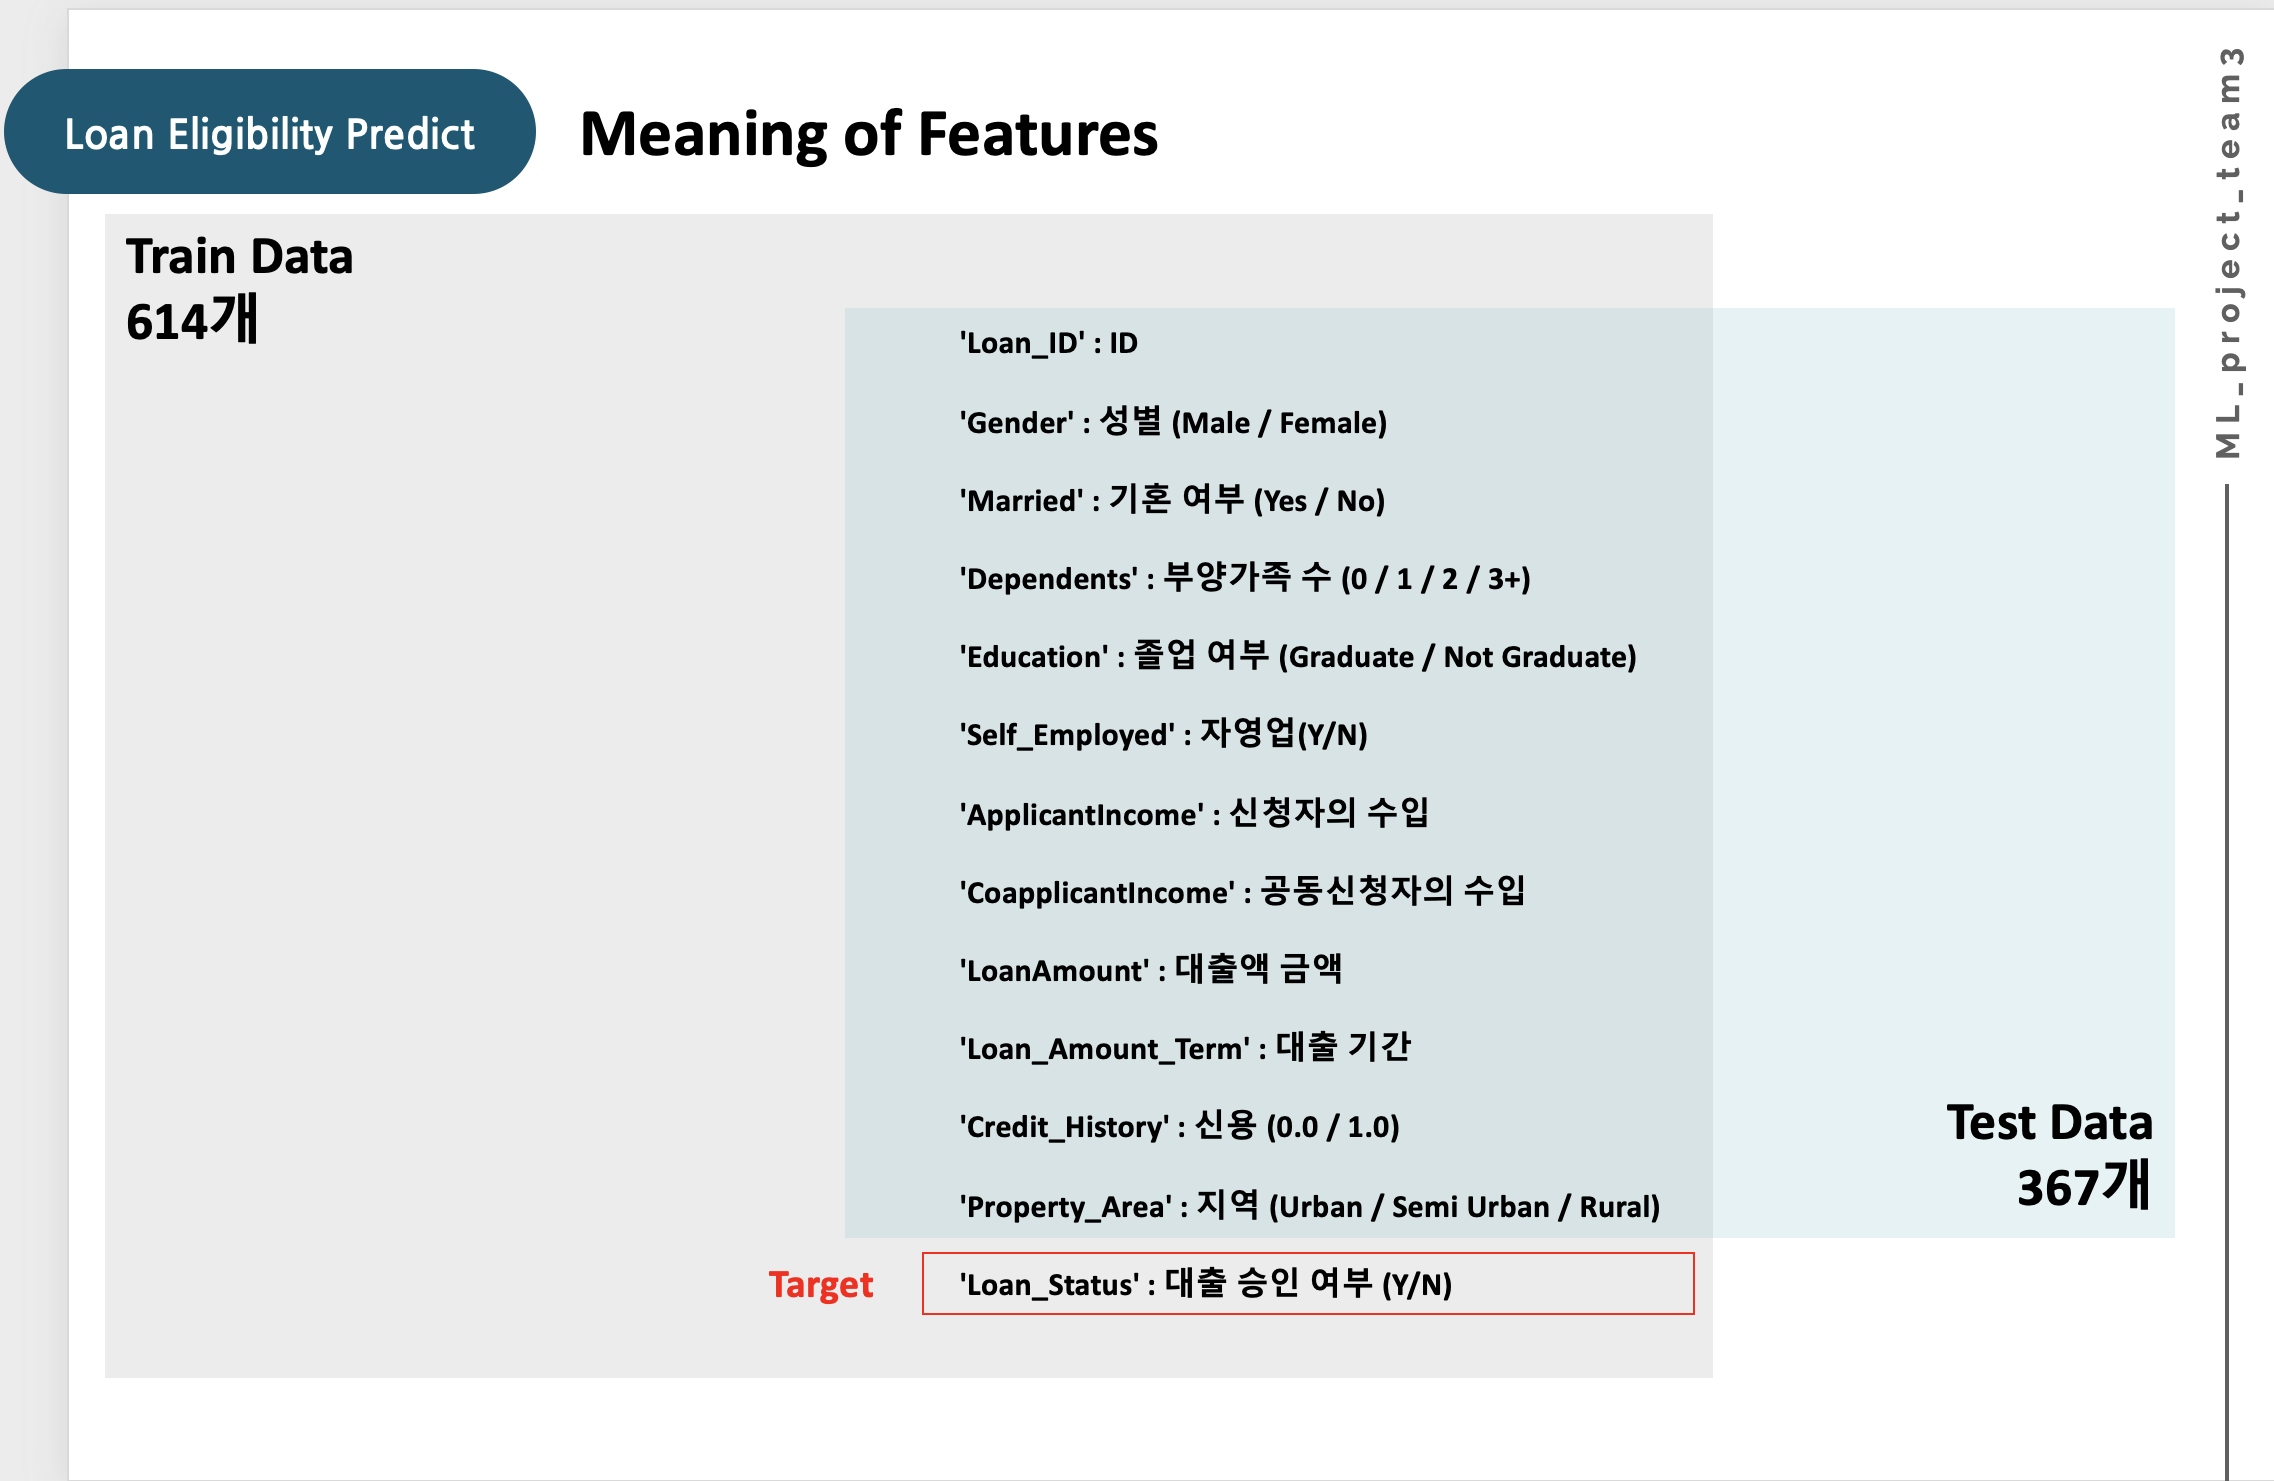

In [6]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### 2.2 데이터 분석

In [8]:
# train data 대출 승인률 (약 69%)
loan_prob = len(loan_train.loc[loan_train['Loan_Status']=='Y']) / len(loan_train)
loan_prob

0.6872964169381107

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

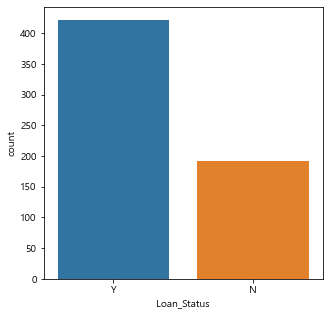

In [9]:
# target인 Loan_Status 확인(위와 같음)
plt.figure(figsize=(5,5))
sns.countplot(loan_train['Loan_Status'])

In [10]:
# 대출 신청자 평균 소득: 5403 달러 
loan_train['ApplicantIncome'].sum() / 614 

5403.459283387622

(array([353., 180.,  44.,  15.,  12.,   3.,   0.,   0.,   1.,   3.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  150. ,  4192.5,  8235. , 12277.5, 16320. , 20362.5, 24405. ,
        28447.5, 32490. , 36532.5, 40575. , 44617.5, 48660. , 52702.5,
        56745. , 60787.5, 64830. , 68872.5, 72915. , 76957.5, 81000. ]),
 <BarContainer object of 20 artists>)

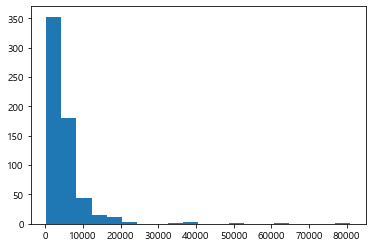

In [11]:
# 대출 신청자 소득 분포 (1만 달러 미만에 많이 분포함)
plt.hist(loan_train['ApplicantIncome'], bins=20)

In [12]:
# 대출 보증인(공동신청자) 평균 소득: 1621 달러 
loan_train['CoapplicantIncome'].sum() / 614 

1621.2457980271008

(array([434., 127.,  36.,  10.,   1.,   2.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([    0.  ,  2083.35,  4166.7 ,  6250.05,  8333.4 , 10416.75,
        12500.1 , 14583.45, 16666.8 , 18750.15, 20833.5 , 22916.85,
        25000.2 , 27083.55, 29166.9 , 31250.25, 33333.6 , 35416.95,
        37500.3 , 39583.65, 41667.  ]),
 <BarContainer object of 20 artists>)

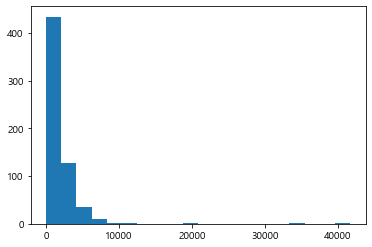

In [13]:
# 대출 보증인(공동신청자) 소득 분포 (5천 달러 미만에 많이 분포함)
plt.hist(loan_train['CoapplicantIncome'], bins=20)

(array([ 12.,  60., 142., 168.,  90.,  53.,  15.,  18.,  10.,   5.,   4.,
          2.,   1.,   4.,   3.,   0.,   1.,   2.,   1.,   1.]),
 array([  9.  ,  43.55,  78.1 , 112.65, 147.2 , 181.75, 216.3 , 250.85,
        285.4 , 319.95, 354.5 , 389.05, 423.6 , 458.15, 492.7 , 527.25,
        561.8 , 596.35, 630.9 , 665.45, 700.  ]),
 <BarContainer object of 20 artists>)

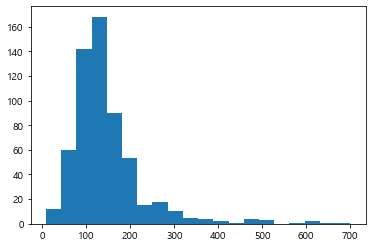

In [14]:
# 대출금액(1000단위, 데이터값이 100K~200K에 몰려있음)
plt.hist(loan_train['LoanAmount'], bins=20)

(array([  1.,   2.,   2.,   4.,   3.,   0.,   0.,  44.,   0.,   4.,   0.,
          0.,  13.,   0., 512.,   0.,   0.,   0.,   0.,  15.]),
 array([ 12. ,  35.4,  58.8,  82.2, 105.6, 129. , 152.4, 175.8, 199.2,
        222.6, 246. , 269.4, 292.8, 316.2, 339.6, 363. , 386.4, 409.8,
        433.2, 456.6, 480. ]),
 <BarContainer object of 20 artists>)

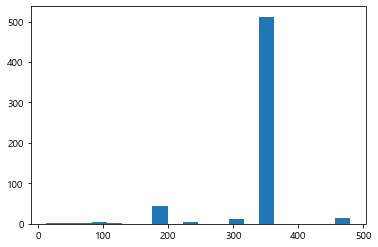

In [15]:
# 대출 기간 (30년이 압도적으로 많음)
plt.hist(loan_train['Loan_Amount_Term'], bins=20)

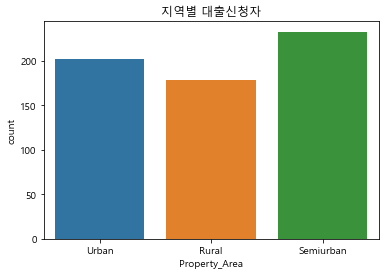

In [16]:
# 지역별 대출신청자 - Semiurban이 제일 많음
sns.countplot(x='Property_Area', data=loan_train)
plt.title('지역별 대출신청자')
plt.show()

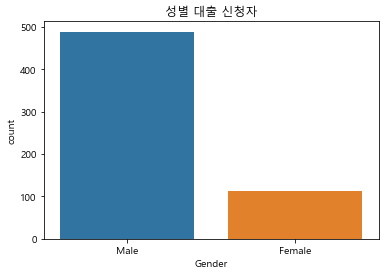

In [17]:
# 대출받는 남성/여성? (Gender) - 남성이 압도적으로 많음
sns.countplot(x='Gender', data=loan_train)
plt.title('성별 대출 신청자')
plt.show()

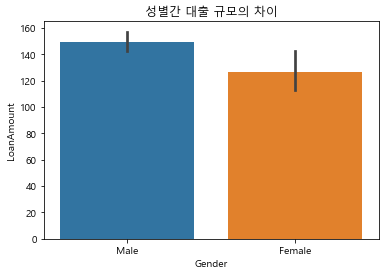

In [18]:
# 남성/여성의 대출 규모가 다를까? (Gender & LoanAmount)
sns.barplot(x='Gender', y='LoanAmount', data=loan_train)
plt.title('성별간 대출 규모의 차이')
plt.show()

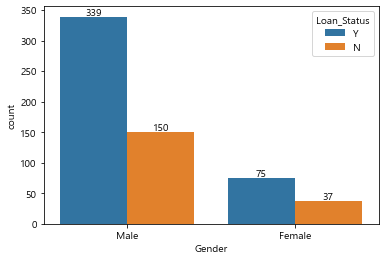

In [19]:
# 대출 가능 여부도 성별로 다를까? (Gender & Loan_Status) - 남성 69%, 여성 67%로 거의 차이 없음
ax = sns.countplot(x='Gender', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

In [20]:
loan_train.groupby("Gender").count()["Loan_Status"]

Gender
Female    112
Male      489
Name: Loan_Status, dtype: int64

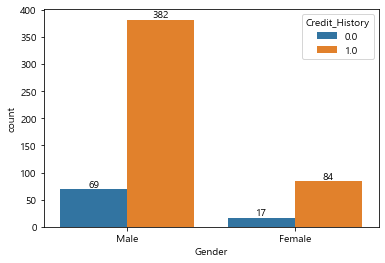

In [21]:
# 성별 신용도 조건 충족 여부 (Gender & Credit_History) - 남성 85%, 여성 83%로 비등함
ax = sns.countplot(x='Gender', hue='Credit_History', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

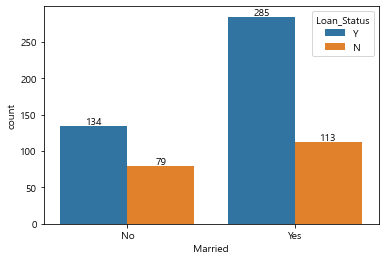

In [22]:
# 기혼자의 경우 대출이 조금 더 쉽게 나올까? (Married & Loan_Status) - 기혼자 71%, 미혼자 63%로 기혼자가 더 수월하게 대출을 받음
ax = sns.countplot(x='Married', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

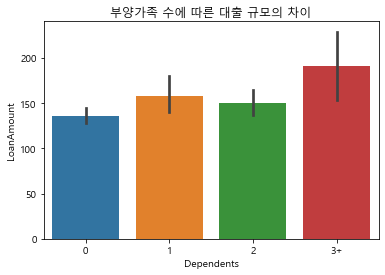

In [23]:
# 부양가족이 있으면 대출 규모가 더 커질까? (Dependents & LoanAmount) - 양의 상관관계가 조금 있어보임
sns.barplot(x='Dependents', y='LoanAmount', data=loan_train)
plt.title('부양가족 수에 따른 대출 규모의 차이')
plt.show()

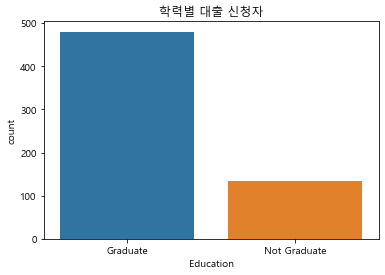

In [24]:
# 대졸자/대졸미만자의 대출 신청 수 - 대졸자가 압도적으로 많음
sns.countplot(x='Education', data=loan_train)
plt.title('학력별 대출 신청자')
plt.show()

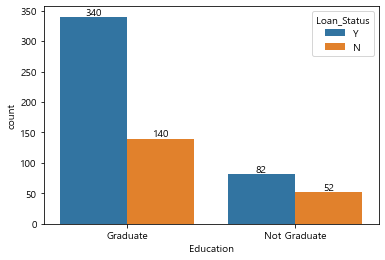

In [25]:
# 대졸자의 경우 대출이 더 쉽게 나올까? (Education & Loan_Status) - 대졸자 71%, 대졸미만 61%로 대졸자가 더 유리해보임
ax = sns.countplot(x='Education', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

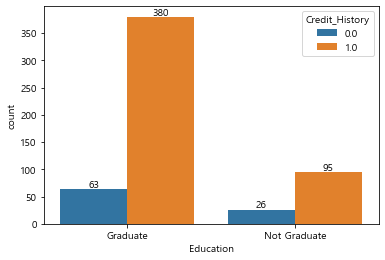

In [26]:
# 대졸자/대졸미만자의 신용도 조건 충족 여부? - 대졸자 86%, 대졸미만자 79%로 대졸자가 조금 더 신용도 조건을 충족했음. 다만 신용도는 결측치가 많은 피쳐이므로 이를 참고해야 함
ax = sns.countplot(x='Education', hue='Credit_History', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

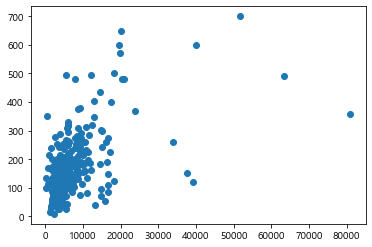

In [27]:
# 소득이 많을수록 대출하고자 하는 금액이 클까? (ApplicantIncome & LoanAmount) - 불분명함
plt.scatter(loan_train['ApplicantIncome'], loan_train['LoanAmount'])
plt.show()

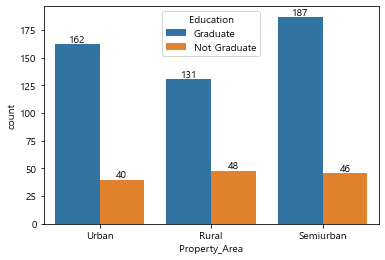

In [28]:
# 사는 지역에 따라 대졸 여부가 다를까? (Property_Area & Education) - Semiurban에서 대졸자/대졸미만자 차이가 제일 두드러짐
ax = sns.countplot(x='Property_Area', hue='Education', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

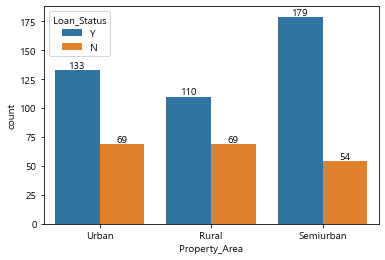

In [29]:
# 사는 지역에 따라 대출 승인 여부가 다를까? (Property_Area & Loan_Status) - Urban 66%, Rural 61%, Semiurban 77%
ax = sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

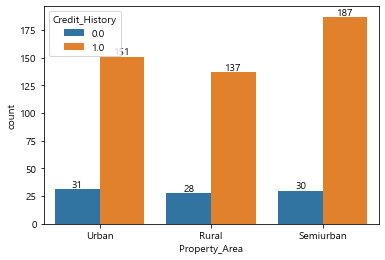

In [30]:
# 사는 지역에 따른 신용도 조건 충족 여부? (Property_Area & Credit_History) - Urban 83%, Rural 83%, Semiurban 86%
ax = sns.countplot(x='Property_Area', hue='Credit_History', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

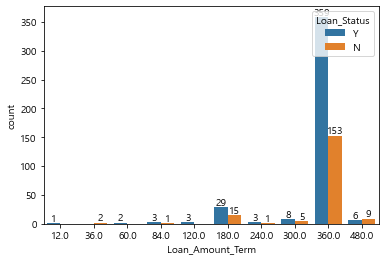

In [31]:
# 대출 기간과 대출 여부에 상관관계가 있을까? (Loan_Amount_Term & Loan_Status) - 대출 승인비가 40년 신청 전후로 나뉨
ax = sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=loan_train)
for value in ax.containers:
    ax.bar_label(value)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

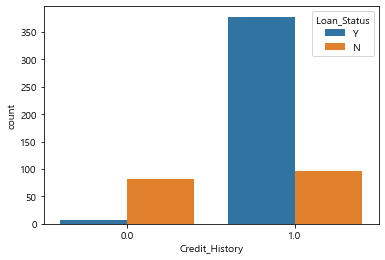

In [32]:
# 신용도 충족에 따른 대출 승인 여부
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_train)

### 2.3 결측치 확인

In [33]:
import missingno as msno

In [34]:
# train data - 7개 feature
loan_train.isnull().sum().sort_values(ascending=False)


Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

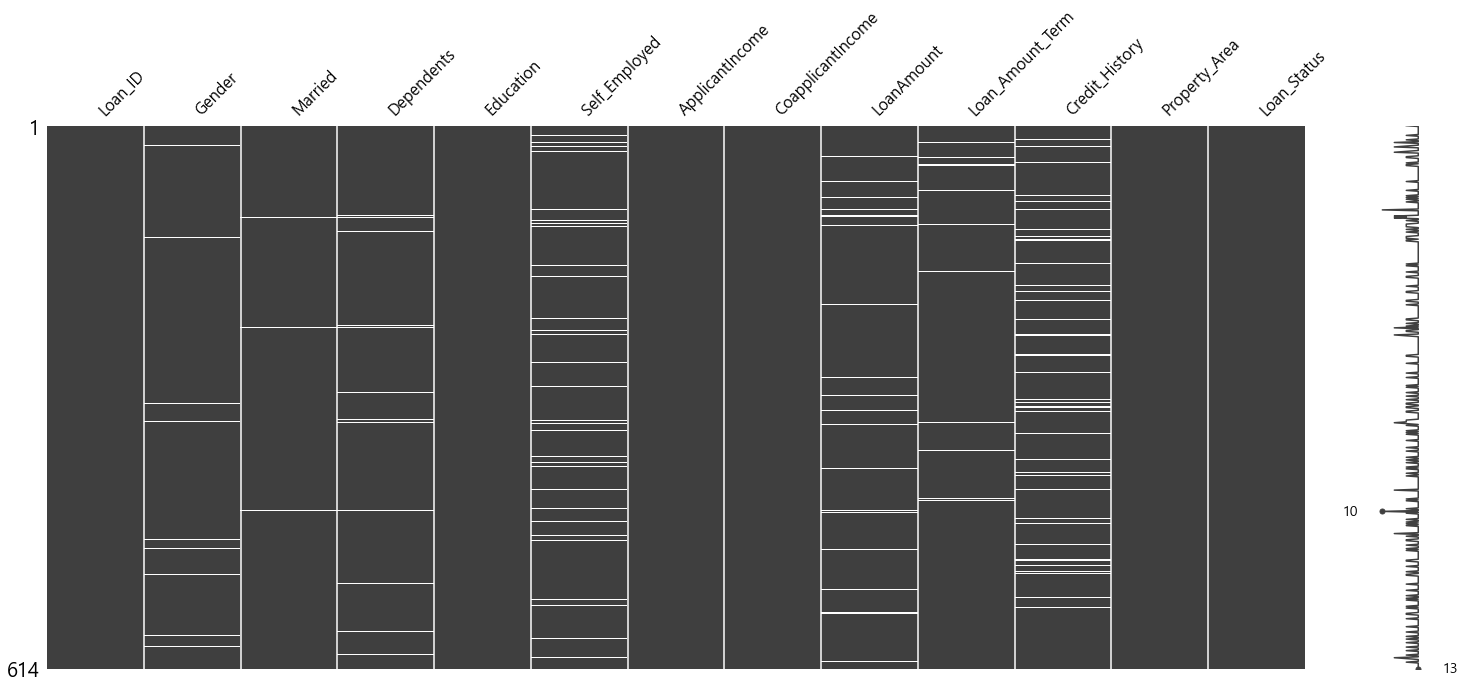

In [35]:
msno.matrix(loan_train)

In [36]:
# test data - 6개 feature
loan_test.isnull().sum().sort_values(ascending=False)


Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

<AxesSubplot:>

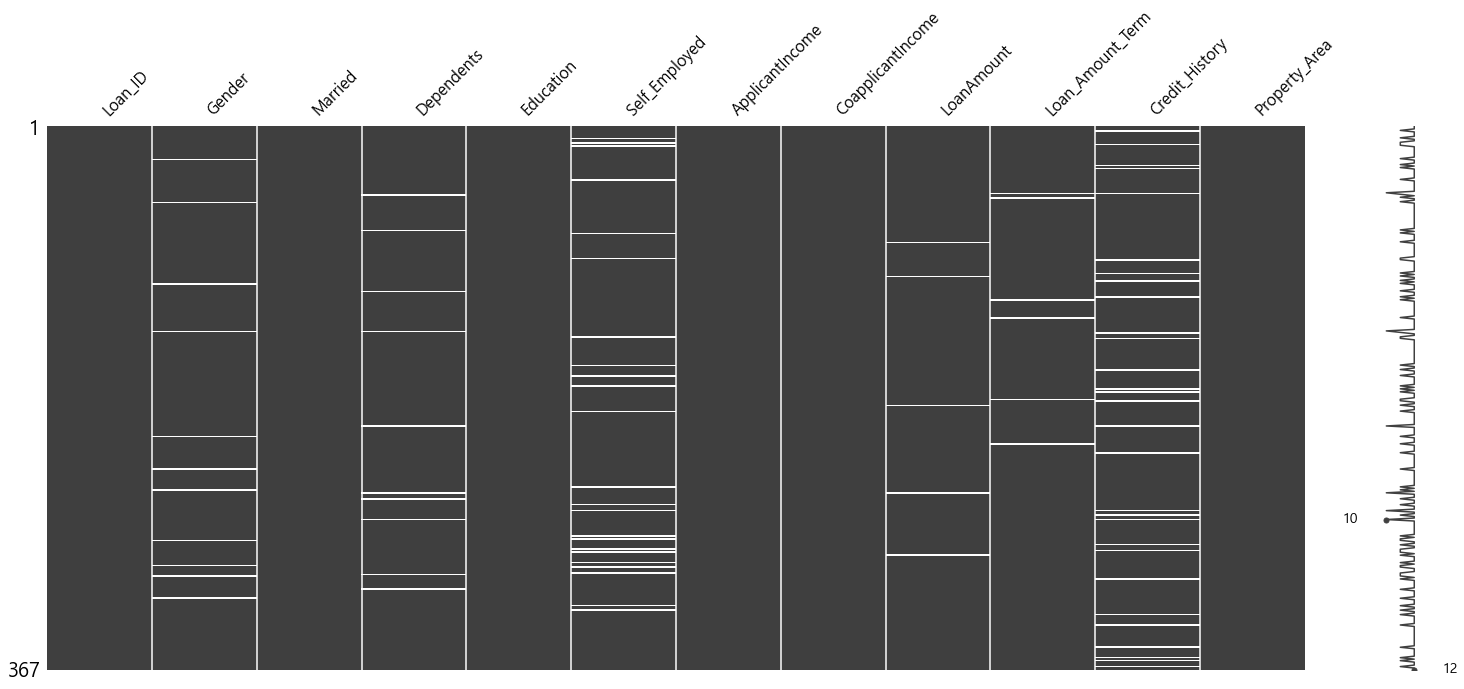

In [37]:
msno.matrix(loan_test)

## 3. 데이터 전처리

### 3.1 특성 제거

In [38]:
print(loan_train.shape)
loan_test.shape

(614, 13)


(367, 12)

In [39]:
# Loan_ID 컬럼 제거
loan_train.drop('Loan_ID', axis=1, inplace=True)
loan_test.drop('Loan_ID', axis=1, inplace=True)

In [40]:
print(loan_train.shape)
loan_test.shape

(614, 12)


(367, 11)

In [41]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### 3.2 데이터 변환

In [42]:
# categorical feature(8)
'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed'
'Credit_History', 'Property_Area', 'Loan_Status(test X)'
# 결측 데이터(5)
'Gender', 'Married(test X)', 'Dependents', 'Self_Employed', 'Credit_History'

# Numerical feature(4)
'ApplicantIncome', 'CoapplicantIncome', 
'LoanAmount', 'Loan_Amount_Term'
# 결측 데이터(2)
'LoanAmount', 'Loan_Amount_Term'

('LoanAmount', 'Loan_Amount_Term')

**변환 :    문자형 -> 수치형**
```
1. Gender --------------> Male/ Female
-> 1/0
2. Married --------------> Applicant married (Y/N)
-> 1/0
3. Education -------------> Applicant Education (Graduate/ Under Graduate)
-> 1/0
4. Self_Employed ---------> Self-employed (Y/N)
-> 1/0
5. Loan_Status -----------> Loan approved (Y/N)
-> 1/0

1. Dependents ------------> Number of dependents
-> 원핫인코딩
2. Property_Area ---------> Urban/ Semi-Urban/ Rural
-> 원핫인코딩

```

In [43]:
# 변환 : categorical(object) -> numerical
# loan_train(5)  --> Credit_History(not object), Property_Area,(원핫), Dependents(원핫)
loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_train.Married = loan_train.Married.replace({"Yes":1, "No":0})
loan_train.Education = loan_train.Education.replace({"Graduate":1, "Not Graduate":0})
loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes":1, "No":0})
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y":1, "N":0})

# loan_test(4)
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Married = loan_test.Married.replace({"Yes":1, "No":0})
loan_test.Education = loan_test.Education.replace({"Graduate":1, "Not Graduate":0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes":1, "No":0})

### 3.3 결측치 채우기

In [44]:
# train data
# categorical data (mode : 최빈값)
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

# numerical data (mean : 평균값)
# 'LoanAmount', 'Loan_Amount_Term'
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean(), inplace=True)

In [45]:
# test data
# categorical data (mode : 최빈값)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

# numerical data (mean : 평균값)
# 'LoanAmount', 'Loan_Amount_Term'
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mean(), inplace=True)

In [46]:
# train data 확인
loan_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
# test data 확인
loan_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### 3.4 원핫인코딩

In [48]:
loan_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [49]:
loan_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [50]:
# Dependents, Property_Area 원핫인코딩
dummies1 = pd.get_dummies(loan_train['Dependents'], prefix='Dependents')
loan_train = pd.concat([loan_train, dummies1], axis=1)

dummies2 = pd.get_dummies(loan_test['Dependents'], prefix='Dependents')
loan_test = pd.concat([loan_test, dummies2], axis=1)

dummies3 = pd.get_dummies(loan_train['Property_Area'], prefix='Property_Area')
loan_train = pd.concat([loan_train, dummies3], axis=1)

dummies4 = pd.get_dummies(loan_test['Property_Area'], prefix='Property_Area')
loan_test = pd.concat([loan_test, dummies4], axis=1)

In [51]:
# 기존 컬럼 Dependents, Property_Area 삭제
loan_train = loan_train.drop(columns=['Dependents', 'Property_Area'], axis=1)
loan_test = loan_test.drop(columns=['Dependents', 'Property_Area'], axis=1)

In [52]:
# 특성 최종 버전
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Dependents_0             614 non-null    uint8  
 11  Dependents_1             614 non-null    uint8  
 12  Dependents_2             614 non-null    uint8  
 13  Dependents_3+            614 non-null    uint8  
 14  Property_Area_Rural      6

### 3.5 Target과의 상관계수 확인

<AxesSubplot:>

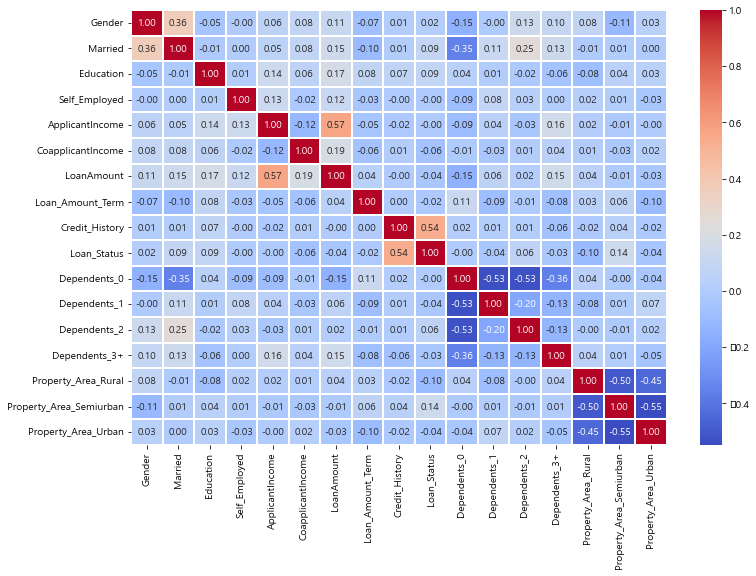

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(),cmap='coolwarm', annot=True, fmt='.2f', linewidths=.1)
# Credit_History(0.54), Semiurban(0.14), Rural(-0.10), 
# Married(0.09), Education(0.09), Dependents2(0.06), 
# CoapplicantIncome(-0.06)

### 3.6 X_train, y_train, x_test 설정

In [54]:
X_train = loan_train.drop('Loan_Status', axis=1)
y_train = loan_train['Loan_Status']
X_test = loan_test

In [55]:
#X_train = X_train.values
#x_test = x_test.values

### 모델 선택 (1) LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
#로지스틱 회귀 인스턴스 생성
lr = LogisticRegression()
#훈련 데이터로 모델 훈련
lr.fit(X_train, y_train)

# 모델 점수
print(lr.score(X_train, y_train))

#예측 결과 출력
lr.predict(X_test)

0.8110749185667753


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [58]:
#변수 종류 출력
print(X_test.head(0))
#각 특징(변수, feature)들의 가중치
print(lr.coef_)

Empty DataFrame
Columns: [Gender, Married, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Dependents_0, Dependents_1, Dependents_2, Dependents_3+, Property_Area_Rural, Property_Area_Semiurban, Property_Area_Urban]
Index: []
[[-1.62089219e-02  3.83368421e-01  4.56568320e-01 -1.16584283e-02
   3.25084660e-06 -6.25747078e-05 -1.85826155e-03 -6.24659081e-03
   3.06043187e+00  2.08631817e-01 -3.52243764e-01  2.82570535e-01
  -8.07989331e-02 -2.66252766e-01  5.41408400e-01 -2.16995979e-01]]


```
Credit_History, Semiurban, Education, Dependents_2...
가장 높은 영향은 Credit_History
```

### 성능 측정 지표

In [59]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [60]:
y_train_pred = cross_val_predict(lr, X_train, y_train, cv=5)

In [61]:
y_train_pred.shape

(614,)

In [62]:
confusion_matrix(y_train, y_train_pred)

array([[ 86, 106],
       [ 14, 408]], dtype=int64)

In [63]:
precision_score(y_train, y_train_pred)

0.7937743190661478

In [64]:
recall_score(y_train, y_train_pred)

0.966824644549763

In [65]:
f1_score(y_train, y_train_pred)

0.8717948717948717

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
cross_val_score(lr, X_train, y_train, scoring="accuracy", cv=5)

array([0.81300813, 0.77235772, 0.79674797, 0.85365854, 0.78688525])

### 교차 검증

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [69]:
skfols = StratifiedKFold(n_splits=4, random_state=42, shuffle=True)

In [70]:
X_train_v = X_train.values

In [71]:
for train_index, test_index in skfols.split(X_train_v, y_train):
    clone_clf = clone(lr)
    x_train_folds = X_train_v[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = X_train_v[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.8116883116883117
0.8246753246753247
0.7973856209150327
0.8104575163398693


### 성능 올리기(1) - 특성 제거

In [72]:
X_train1 = loan_train[['Credit_History','Married','Property_Area_Semiurban','Property_Area_Rural','CoapplicantIncome','Education','Dependents_2']]
y_train1 = loan_train['Loan_Status']
X_test1 = loan_test[['Credit_History','Married','Property_Area_Semiurban','Property_Area_Rural','CoapplicantIncome','Education','Dependents_2']]

In [73]:
#로지스틱 회귀 인스턴스 생성
lr = LogisticRegression()
#훈련 데이터로 모델 훈련
lr.fit(X_train1, y_train1)

#모델 점수
print(lr.score(X_train1, y_train1))
#예측 결과 출력
lr.predict(X_test1)

0.8127035830618893


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [74]:
#변수 종류 출력
print(X_test1.head(0))
#각 특징(변수, feature)들의 가중치
print(lr.coef_)

Empty DataFrame
Columns: [Credit_History, Married, Property_Area_Semiurban, Property_Area_Rural, CoapplicantIncome, Education, Dependents_2]
Index: []
[[ 3.32452041e+00  5.41689537e-01  4.17614013e-01 -4.08252960e-01
  -5.95741172e-05  2.92390032e-01  4.24718508e-01]]


In [75]:
y_train_pred = cross_val_predict(lr, X_train1, y_train1, cv=5)

In [76]:
y_train_pred.shape

(614,)

In [77]:
confusion_matrix(y_train1, y_train_pred)

array([[ 82, 110],
       [  7, 415]], dtype=int64)

In [78]:
precision_score(y_train1, y_train_pred)

0.7904761904761904

In [79]:
recall_score(y_train1, y_train_pred)

0.9834123222748815

In [80]:
f1_score(y_train1, y_train_pred)

0.8764519535374867

In [81]:
cross_val_score(lr, X_train1, y_train1, scoring="accuracy", cv=5)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [82]:
X_train1_v = X_train1.values

In [83]:
for train_index, test_index in skfols.split(X_train1_v, y_train1):
    clone_clf = clone(lr)
    x_train_folds = X_train1_v[train_index]
    y_train_folds = y_train1[train_index]
    x_test_fold = X_train1_v[test_index]
    y_test_fold = y_train1[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.8051948051948052
0.8246753246753247
0.803921568627451
0.8104575163398693


### 성능 올리기(2) - 스케일링

In [84]:
## 스케일링
from sklearn.preprocessing import StandardScaler
# 변형 객체 생성
std = StandardScaler()

# 훈련데이터의 모수 분포 저장
std.fit(X_train1)

# 훈련 데이터 스케일링
X_train_scaled = std.transform(X_train1)

# 테스트 데이터의 스케일링
X_test_scaled = std.transform(X_test1)

In [85]:
X_train_scaled

array([[ 0.41173269, -1.37208932, -0.7820157 , ..., -0.55448733,
         0.52836225, -0.44371285],
       [ 0.41173269,  0.72881553, -0.7820157 , ..., -0.03873155,
         0.52836225, -0.44371285],
       [ 0.41173269,  0.72881553, -0.7820157 , ..., -0.55448733,
         0.52836225, -0.44371285],
       ...,
       [ 0.41173269,  0.72881553, -0.7820157 , ..., -0.47240418,
         0.52836225, -0.44371285],
       [ 0.41173269,  0.72881553, -0.7820157 , ..., -0.55448733,
         0.52836225,  2.25370981],
       [-2.42876026, -1.37208932,  1.2787467 , ..., -0.55448733,
         0.52836225, -0.44371285]])

In [86]:
X_test_scaled

array([[ 0.41173269,  0.72881553, -0.7820157 , ..., -0.55448733,
         0.52836225, -0.44371285],
       [ 0.41173269,  0.72881553, -0.7820157 , ..., -0.04146765,
         0.52836225, -0.44371285],
       [ 0.41173269,  0.72881553, -0.7820157 , ...,  0.06113628,
         0.52836225,  2.25370981],
       ...,
       [ 0.41173269, -1.37208932,  1.2787467 , ...,  0.12714481,
         0.52836225, -0.44371285],
       [ 0.41173269,  0.72881553, -0.7820157 , ...,  0.26395006,
         0.52836225, -0.44371285],
       [ 0.41173269, -1.37208932, -0.7820157 , ..., -0.55448733,
         0.52836225, -0.44371285]])

In [87]:
#로지스틱 회귀 인스턴스 생성
lr = LogisticRegression()
#훈련 데이터로 모델 훈련
lr.fit(X_train_scaled, y_train)

# 모델 점수
print(lr.score(X_train_scaled, y_train))

#예측 결과 출력
lr.predict(X_test_scaled)


0.8127035830618893


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [88]:
lr.coef_

array([[ 1.34349281,  0.2250673 ,  0.31979286, -0.09630165, -0.17186017,
         0.14363794,  0.14361662]])

In [89]:
y_train_pred = cross_val_predict(lr, X_train_scaled, y_train1, cv=5)

In [90]:
y_train_pred.shape

(614,)

In [91]:
confusion_matrix(y_train, y_train_pred)

array([[ 82, 110],
       [  7, 415]], dtype=int64)

In [92]:
precision_score(y_train, y_train_pred)

0.7904761904761904

In [93]:
recall_score(y_train, y_train_pred)

0.9834123222748815

In [94]:
f1_score(y_train, y_train_pred)

0.8764519535374867

In [95]:
cross_val_score(lr, X_train_scaled, y_train, scoring="accuracy", cv=5)

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [96]:
for train_index, test_index in skfols.split(X_train_scaled, y_train):
    clone_clf = clone(lr)
    x_train_folds = X_train_scaled[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = X_train_scaled[test_index]
    y_test_fold = y_train[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/ len(y_pred))

0.8116883116883117
0.8246753246753247
0.803921568627451
0.8104575163398693


### 그리드서치

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
lr = LogisticRegression()
param_grid = [{'C': np.linspace(0.1, 10, 100)}]
gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ])}],
             scoring='accuracy')

In [99]:
print('최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(gs.best_params_, gs.best_score_))


최적 하이퍼 파라미터 : {'C': 0.1}, 최적 평균 정확도 : 0.809


### 모델 선택 (2) SVM

In [100]:
# 기본
X_train = loan_train.drop(columns='Loan_Status',axis=1).values
y_train = loan_train['Loan_Status'].values
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)
print(svm_clf.score(X_train, y_train))

0.6856677524429967


#### 성능 향상 방법 1 - 특성제거

In [101]:
X_train = loan_train[['Credit_History','Married','Property_Area_Semiurban','Property_Area_Rural','CoapplicantIncome','Education','Dependents_2']].values
y_train = loan_train['Loan_Status'].values
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)
print(svm_clf.score(X_train, y_train))

0.7964169381107492


#### 성능 향상 방법 2 - 스케일링

In [102]:
from sklearn.preprocessing import StandardScaler
temp_col = ['Credit_History','Married','Property_Area_Semiurban','Property_Area_Rural','Education','Dependents_2']
std_scaler_col = ['CoapplicantIncome']
std_scaler = StandardScaler()
X_train = loan_train[temp_col]
X_train['CoapplicantIncome']=std_scaler.fit_transform(loan_train[std_scaler_col])
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train, y_train)
print(svm_clf.score(X_train, y_train))

0.8127035830618893


### 모델 선택 (3) 결정 트리

In [108]:
loan_train = pd.read_csv('./datasets/loan-train.csv')

In [109]:
# Loan_ID 컬럼 제거
loan_train.drop('Loan_ID', axis=1, inplace=True)

# categorical feature(8)
'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed'
'Credit_History', 'Property_Area', 'Loan_Status(test X)'
# 결측 데이터(5)
'Gender', 'Married(test X)', 'Dependents', 'Self_Employed', 'Credit_History'

# Numerical feature(4)
'ApplicantIncome', 'CoapplicantIncome', 
'LoanAmount', 'Loan_Amount_Term'
# 결측 데이터(2)
'LoanAmount', 'Loan_Amount_Term'

# 변환 : categorical(object) -> numerical
# loan_train(5)  --> Credit_History(not object), Property_Area,(원핫), Dependents(원핫)
loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_train.Married = loan_train.Married.replace({"Yes":1, "No":0})
loan_train.Education = loan_train.Education.replace({"Graduate":1, "Not Graduate":0})
loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes":1, "No":0})
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y":1, "N":0})

# train data
# categorical data (mode : 최빈값)
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

# numerical data (mean : 평균값)
# 'LoanAmount', 'Loan_Amount_Term'
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean(), inplace=True)

# Dependents, Property_Area 원핫인코딩
dummies1 = pd.get_dummies(loan_train['Dependents'], prefix='Dependents')
loan_train = pd.concat([loan_train, dummies1], axis=1)

dummies3 = pd.get_dummies(loan_train['Property_Area'], prefix='Property_Area')
loan_train = pd.concat([loan_train, dummies3], axis=1)

# 기존 컬럼 Dependents, Property_Area 삭제
loan_train = loan_train.drop(columns=['Dependents', 'Property_Area'], axis=1)

In [110]:
# 80:20 으로 train / test 데이터 분리
loan_train_X = loan_train.iloc[:492, :]
loan_train_X.drop('Loan_Status', axis=1, inplace=True)
loan_train_y = loan_train.iloc[:492, 9]

loan_test_X = loan_train.iloc[492:, :]
loan_test_X.drop('Loan_Status', axis=1, inplace=True)
loan_test_y = loan_train.iloc[492:, 9]

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [112]:
param_grid = [
    {'max_features': [2, 4, 6, 8, 10], 'max_depth' : [2, 3, 4, 5, 6]},
    #{'n_estimators': [100, 200, 300], 'max_features': [12, 14, 16], 'max_depth' : [10, 12, 14, 16, 18]},
    #{'n_estimators': [200], 'max_features': ["auto", "sqrt"], 'max_depth' : [10, 12, 14]}
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
tree_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_clf, param_grid, cv=5,
                           return_train_score=True, n_jobs=-1)
%time grid_search.fit(loan_train_X, loan_train_y)

CPU times: total: 234 ms
Wall time: 4.19 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6],
                          'max_features': [2, 4, 6, 8, 10]}],
             return_train_score=True)

In [113]:
grid_search.best_params_

{'max_depth': 2, 'max_features': 4}

#### 기본 모델값

In [114]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(loan_train_X, loan_train_y)
tree_clf_pred = tree_clf.predict(loan_test_X)
tree_clf_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

#### 성능 향상 방법 1 - 그리드 서치를 통한 파라미터 값 변경

In [115]:
# 2. 결정 트리 - 베스트 파라미터 값 O
tree_clf_param = DecisionTreeClassifier(max_depth=2, max_features=4, random_state=42)
tree_clf_param.fit(loan_train_X, loan_train_y)
tree_clf_param_pred = tree_clf_param.predict(loan_test_X)
tree_clf_param_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [116]:
export_graphviz(tree_clf_param,
                out_file = 'loan_tree.dot',
                feature_names = loan_train_X.columns,
                class_names = ['No', 'Yes'],
                rounded = True,
                filled = True
               )

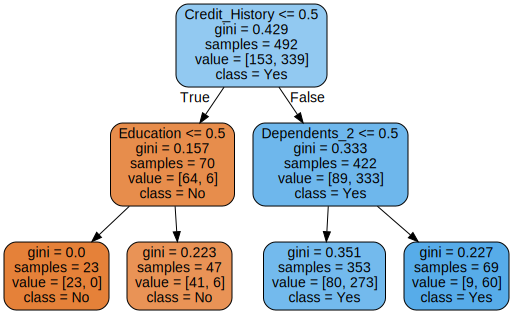

In [117]:
with open ('loan_tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [118]:
# 특성 중요도 체크
feature_imp = tree_clf_param.feature_importances_
print('{}'.format(feature_imp))

[0.         0.         0.00825399 0.         0.         0.
 0.         0.         0.97422989 0.         0.         0.01751612
 0.         0.         0.         0.        ]


#### 성능 향상 방법 2 - 랜덤 포레스트

In [119]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [10, 50, 100, 200, 300], 'max_features': [2, 4, 6, 8, 10], 'max_depth' : [2, 3, 4, 5, 6]},
    #{'n_estimators': [100, 200, 300], 'max_features': [12, 14, 16], 'max_depth' : [10, 12, 14, 16, 18]},
    #{'n_estimators': [200], 'max_features': ["auto", "sqrt"], 'max_depth' : [10, 12, 14]}
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_cla = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_cla, param_grid, cv=5, 
                           return_train_score=True, n_jobs=-1)
%time grid_search.fit(loan_train_X, loan_train_y)

CPU times: total: 1.08 s
Wall time: 57.6 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 4, 5, 6],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [10, 50, 100, 200, 300]}],
             return_train_score=True)

In [120]:
grid_search.best_params_

{'max_depth': 3, 'max_features': 6, 'n_estimators': 10}

In [121]:
# 랜덤 포레스트
rfc = RandomForestClassifier(max_depth=3, max_features=6, n_estimators=10, random_state=42)
rfc.fit(loan_train_X, loan_train_y)
rfc_pred = rfc.predict(loan_test_X)
rfc_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

#### 성능 평가

In [122]:
# 기본 모델
from sklearn.metrics import accuracy_score, f1_score
print("결정 트리 1개 모델 (최적 파라미터 X)")
print("정확도 :", accuracy_score(tree_clf_pred, loan_test_y))
print("F1 Score :", f1_score(tree_clf_pred, loan_test_y))

결정 트리 1개 모델 (최적 파라미터 X)
정확도 : 0.7459016393442623
F1 Score : 0.8074534161490683


In [123]:
# 방법 1
from sklearn.metrics import accuracy_score, f1_score
print("결정 트리 1개 모델 (최적 파라미터 O)")
print("정확도 :", accuracy_score(tree_clf_param_pred, loan_test_y))
print("F1 Score :", f1_score(tree_clf_param_pred, loan_test_y))
tree_clf_param_pred

결정 트리 1개 모델 (최적 파라미터 O)
정확도 : 0.819672131147541
F1 Score : 0.8817204301075269


array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [124]:
# 방법 2
print("랜덤 포레스트 모델")
print("정확도 :", accuracy_score(rfc_pred, loan_test_y))
print("F1 Score :", f1_score(rfc_pred, loan_test_y))

랜덤 포레스트 모델
정확도 : 0.819672131147541
F1 Score : 0.8817204301075269



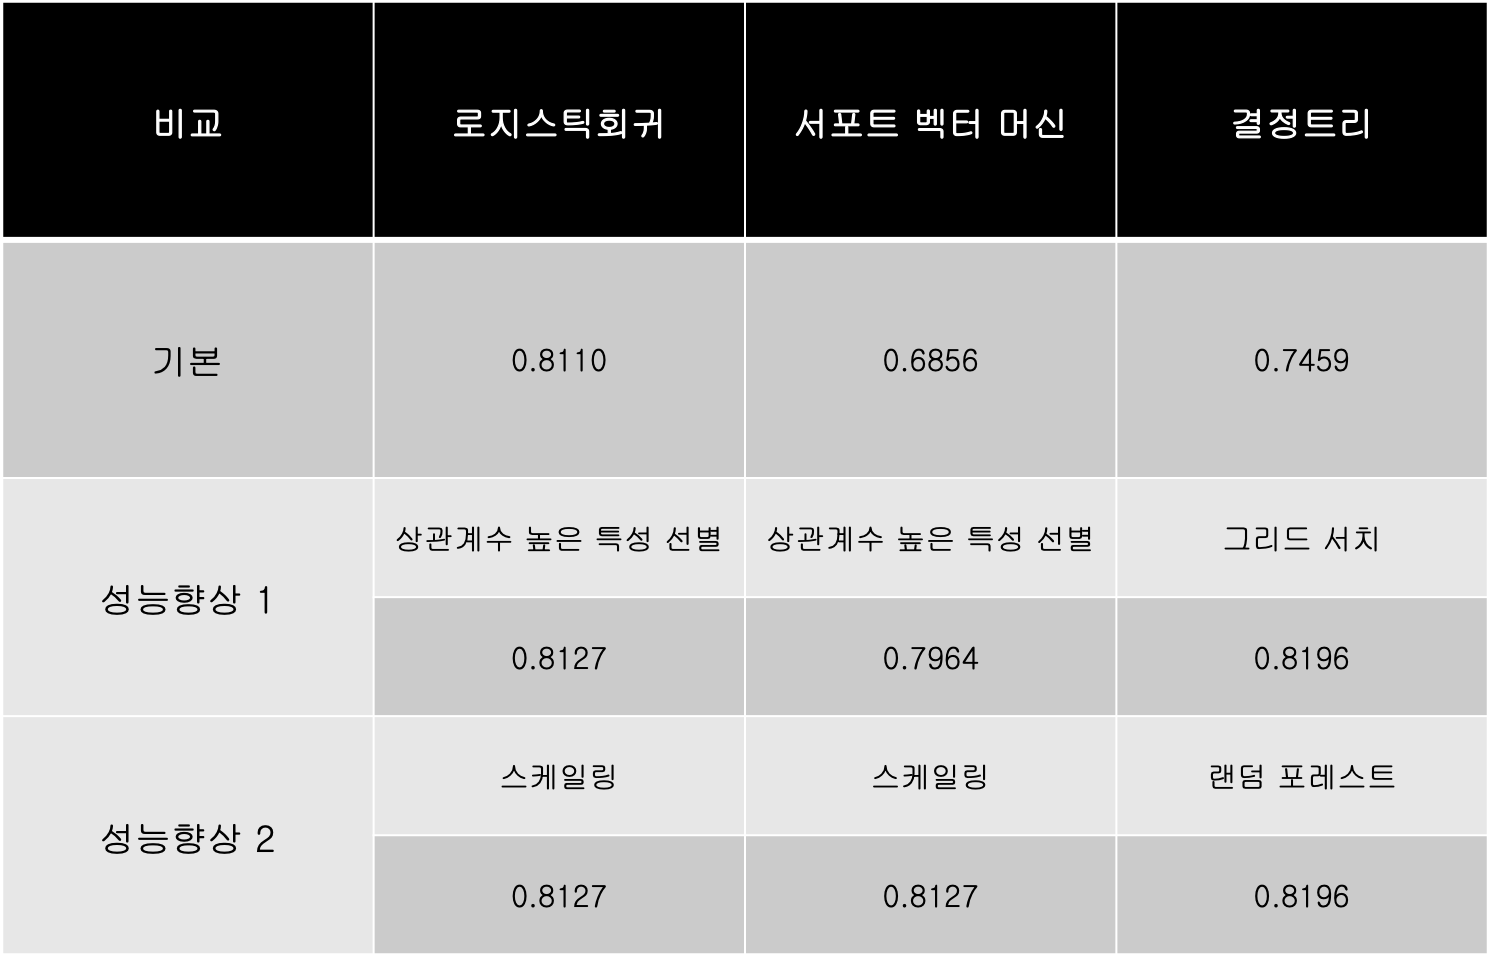